Name: Feifan Gu /
Github Username: Feifan126 /
USC ID: 8135699631

#### 1. Decision Trees as Interpretable Models

(a) Download the Accute Inflamations data 

In [1]:
with open("../data/diagnosis.names", "r", encoding="utf-8") as f:
    for line in f:
        print(line.strip()) 

Title: Acute Inflammations

Abstract: The data was created by a medical expert as a data set to test
the expert system, which will perform the presumptive diagnosis of two
diseases of the urinary system.

----------------------------------------------------------------------------

Data Set Characteristics:  Multivariate
Attribute Characteristics: Categorical, Integer
Associated Tasks: Classification
Number of Instances: 120
Number of Attributes: 6
Missing Values? No
Area: Life
Date Donated: 2009-02-11

----------------------------------------------------------------------------

Source:

Jacek Czerniak, Ph.D., Assistant Professor
Systems Research Institute
Polish Academy of Sciences
Laboratory of Intelligent Systems
ul. Newelska 6, Room 218
01-447 Warszawa, Poland
e-mail: jacek.czerniak 'at' ibspan.waw.pl or jczerniak 'at' ukw.edu.pl

----------------------------------------------------------------------------


Data Set Information:

The main idea of this data set is to prepare the a

In [2]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load the dataset
file_path = '../data/diagnosis.data'  # Update the path if needed
column_names = [
    'Temperature', 
    'Nausea',  
    'Lumbar Pain',
    'Urine Pushing',
    'Micturition Pains', 
    'Burning Urethra', 
    'Inflammation of Urinary Bladder', 
    'Nephritis of Renal Pelvis Origin' 
]

# Read the dataset
data = pd.read_csv(file_path, sep='\t', header=None, names=column_names, encoding='utf-16')

# Convert 'Temperature' to numeric (handling comma as decimal separator)
data['Temperature'] = data['Temperature'].astype(str).str.replace(',', '.').astype(float)

# Convert 'yes'/'no' values to binary (1 for 'yes', 0 for 'no')
binary_columns = column_names[1:]  # All columns except Temperature
data[binary_columns] = data[binary_columns].applymap(lambda x: 1 if str(x).strip().lower() == 'yes' else 0)

# Create a combined label using Label Powerset approach
data['Combined_Label'] = data['Inflammation of Urinary Bladder'].astype(str) + "_" + data['Nephritis of Renal Pelvis Origin'].astype(str)

# Encode the combined labels into unique classes
label_encoder = LabelEncoder()
data['Encoded_Label'] = label_encoder.fit_transform(data['Combined_Label'])

# Define features and target
X = data.drop(columns=['Inflammation of Urinary Bladder', 'Nephritis of Renal Pelvis Origin', 'Combined_Label', 'Encoded_Label'])
y = data['Encoded_Label']

/var/folders/z5/p623_8n54rg7n5k8q4brrmqw0000gn/T/ipykernel_63692/2982640048.py:25: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  data[binary_columns] = data[binary_columns].applymap(lambda x: 1 if str(x).strip().lower() == 'yes' else 0)


(b) Build a decision tree on the whole data set and plot it.

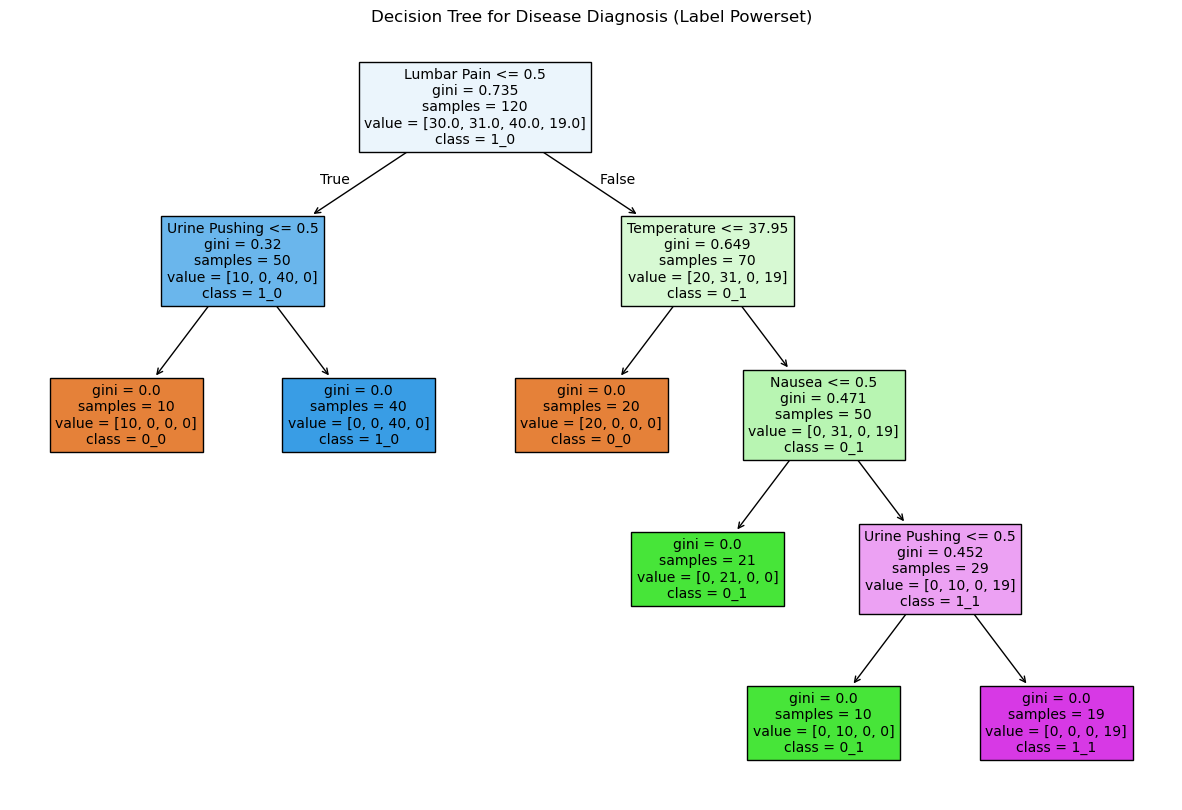

In [3]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Train Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X, y)

# Plot the decision tree
plt.figure(figsize=(15, 10))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=label_encoder.classes_)
plt.title("Decision Tree for Disease Diagnosis (Label Powerset)")
plt.show()

(c) Convert the decision rules into a set of IF-THEN rules.

In [4]:
def decision_tree(Temperature, Nausea, Lumbar_Pain, Urine_Pushing, Micturition_Pains, Burning_Urethra):
    if Lumbar_Pain <= 0.5:
        if Urine_Pushing <= 0.5:
            return '0_0'
        else:  # if Urine_Pushing > 0.5
            return '1_0'
    else:  # if Lumbar_Pain > 0.5
        if Temperature <= 37.95:
            return '0_0'
        else:  # if Temperature > 37.95
            if Nausea <= 0.5:
                return '0_1'
            else:  # if Nausea > 0.5
                if Urine_Pushing <= 0.5:
                    return '0_1'
                else:  # if Urine_Pushing > 0.5
                    return '1_1'

(d) Use cost-complexity pruning to find a minimal decision tree and a set of decision rules with high interpretability.

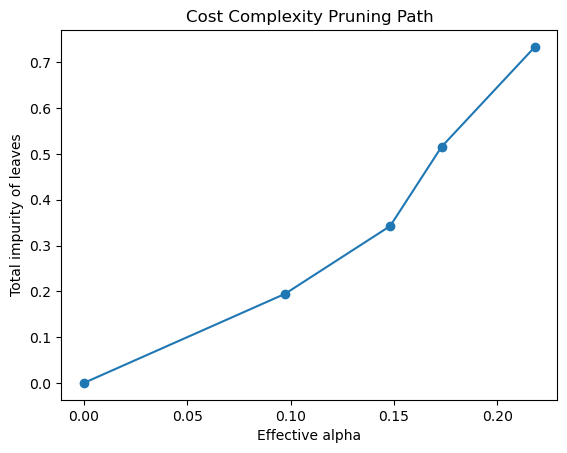

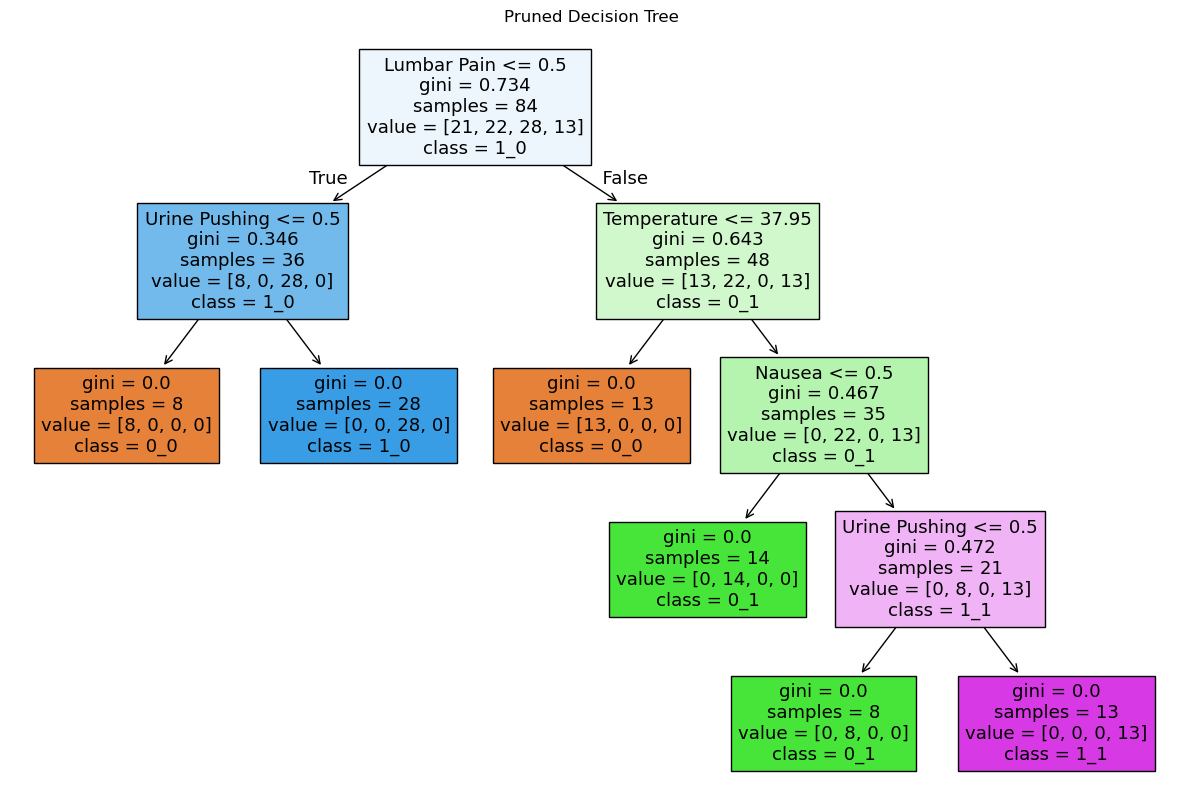

def decision_tree(Temperature, Nausea, Lumbar Pain, Urine Pushing, Micturition Pains, Burning Urethra):
  if Lumbar Pain <= 0.50:
    if Urine Pushing <= 0.50:
      return '0_0'
    else:  # if Urine Pushing > 0.50
      return '1_0'
  else:  # if Lumbar Pain > 0.50
    if Temperature <= 37.95:
      return '0_0'
    else:  # if Temperature > 37.95
      if Nausea <= 0.50:
        return '0_1'
      else:  # if Nausea > 0.50
        if Urine Pushing <= 0.50:
          return '0_1'
        else:  # if Urine Pushing > 0.50
          return '1_1'


In [5]:
from sklearn.tree import DecisionTreeClassifier, _tree
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Split data into features and target
X = data.drop(columns=['Inflammation of Urinary Bladder', 'Nephritis of Renal Pelvis Origin', 'Combined_Label', 'Encoded_Label'])
y = data['Encoded_Label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a decision tree classifier with a default parameter (before pruning)
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Get the effective alpha values for pruning
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path['ccp_alphas']
impurities = path['impurities']

# Plot the effect of ccp_alpha on tree complexity
plt.plot(ccp_alphas, impurities, marker="o")
plt.xlabel("Effective alpha")
plt.ylabel("Total impurity of leaves")
plt.title("Cost Complexity Pruning Path")
plt.show()

# Find the optimal ccp_alpha (for simplicity, you could choose a value based on the plot)
optimal_ccp_alpha = ccp_alphas[impurities.argmin()]

# Re-train the decision tree with the optimal ccp_alpha
clf_pruned = DecisionTreeClassifier(random_state=42, ccp_alpha=optimal_ccp_alpha)
clf_pruned.fit(X_train, y_train)

# Display the pruned decision tree
plt.figure(figsize=(15, 10))
plot_tree(clf_pruned, filled=True, feature_names=X.columns, class_names=label_encoder.classes_)
plt.title("Pruned Decision Tree")
plt.show()

# Function to extract decision rules from the pruned decision tree
def tree_to_code(tree, feature_names, class_names):
    tree_ = tree.tree_
    feature_name = [
        feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]

    rules = ["def decision_tree({}):".format(", ".join(feature_names))]

    def recurse(node, depth):
        indent = "  " * depth
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            rules.append(f"{indent}if {name} <= {threshold:.2f}:")
            recurse(tree_.children_left[node], depth + 1)
            rules.append(f"{indent}else:  # if {name} > {threshold:.2f}")
            recurse(tree_.children_right[node], depth + 1)
        else:
            label = class_names[tree_.value[node].argmax()]
            rules.append(f"{indent}return '{label}'")

    recurse(0, 1)

    return "\n".join(rules)

# Extract and display the rules from the pruned decision tree
decision_tree_code = tree_to_code(clf_pruned, list(X.columns), label_encoder.classes_)
print(decision_tree_code)


#### 2. The LASSO and Boosting for Regression

(a) Download the Communities and Crime data

In [6]:
import pandas as pd

# Define file path
file_path = "../data/communities.data"  # Update the path if necessary

# Define column names based on the dataset description
column_names = [
    "state", "county", "community", "communityname", "fold", "population", "householdsize", "racepctblack",
    "racePctWhite", "racePctAsian", "racePctHisp", "agePct12t21", "agePct12t29", "agePct16t24", "agePct65up",
    "numbUrban", "pctUrban", "medIncome", "pctWWage", "pctWFarmSelf", "pctWInvInc", "pctWSocSec", "pctWPubAsst",
    "pctWRetire", "medFamInc", "perCapInc", "whitePerCap", "blackPerCap", "indianPerCap", "AsianPerCap",
    "OtherPerCap", "HispPerCap", "NumUnderPov", "PctPopUnderPov", "PctLess9thGrade", "PctNotHSGrad",
    "PctBSorMore", "PctUnemployed", "PctEmploy", "PctEmplManu", "PctEmplProfServ", "PctOccupManu",
    "PctOccupMgmtProf", "MalePctDivorce", "MalePctNevMarr", "FemalePctDiv", "TotalPctDiv", "PersPerFam",
    "PctFam2Par", "PctKids2Par", "PctYoungKids2Par", "PctTeen2Par", "PctWorkMomYoungKids", "PctWorkMom",
    "NumIlleg", "PctIlleg", "NumImmig", "PctImmigRecent", "PctImmigRec5", "PctImmigRec8", "PctImmigRec10",
    "PctRecentImmig", "PctRecImmig5", "PctRecImmig8", "PctRecImmig10", "PctSpeakEnglOnly", "PctNotSpeakEnglWell",
    "PctLargHouseFam", "PctLargHouseOccup", "PersPerOccupHous", "PersPerOwnOccHous", "PersPerRentOccHous",
    "PctPersOwnOccup", "PctPersDenseHous", "PctHousLess3BR", "MedNumBR", "HousVacant", "PctHousOccup",
    "PctHousOwnOcc", "PctVacantBoarded", "PctVacMore6Mos", "MedYrHousBuilt", "PctHousNoPhone", "PctWOFullPlumb",
    "OwnOccLowQuart", "OwnOccMedVal", "OwnOccHiQuart", "RentLowQ", "RentMedian", "RentHighQ", "MedRent",
    "MedRentPctHousInc", "MedOwnCostPctInc", "MedOwnCostPctIncNoMtg", "NumInShelters", "NumStreet",
    "PctForeignBorn", "PctBornSameState", "PctSameHouse85", "PctSameCity85", "PctSameState85", "LemasSwornFT",
    "LemasSwFTPerPop", "LemasSwFTFieldOps", "LemasSwFTFieldPerPop", "LemasTotalReq", "LemasTotReqPerPop",
    "PolicReqPerOffic", "PolicPerPop", "RacialMatchCommPol", "PctPolicWhite", "PctPolicBlack", "PctPolicHisp",
    "PctPolicAsian", "PctPolicMinor", "OfficAssgnDrugUnits", "NumKindsDrugsSeiz", "PolicAveOTWorked", "LandArea",
    "PopDens", "PctUsePubTrans", "PolicCars", "PolicOperBudg", "LemasPctPolicOnPatr", "LemasGangUnitDeploy",
    "LemasPctOfficDrugUn", "PolicBudgPerPop", "ViolentCrimesPerPop"
]

# Load the dataset, handling missing values denoted by '?'
data = pd.read_csv(file_path, names=column_names, na_values="?", header=None)

# Display the first few rows of the dataset
print(data.head())

   state  county  community        communityname  fold  population  \
0      8     NaN        NaN         Lakewoodcity     1        0.19   
1     53     NaN        NaN          Tukwilacity     1        0.00   
2     24     NaN        NaN         Aberdeentown     1        0.00   
3     34     5.0    81440.0  Willingborotownship     1        0.04   
4     42    95.0     6096.0    Bethlehemtownship     1        0.01   

   householdsize  racepctblack  racePctWhite  racePctAsian  ...  LandArea  \
0           0.33          0.02          0.90          0.12  ...      0.12   
1           0.16          0.12          0.74          0.45  ...      0.02   
2           0.42          0.49          0.56          0.17  ...      0.01   
3           0.77          1.00          0.08          0.12  ...      0.02   
4           0.55          0.02          0.95          0.09  ...      0.04   

   PopDens  PctUsePubTrans  PolicCars  PolicOperBudg  LemasPctPolicOnPatr  \
0     0.26            0.20       0.06  

(b) The data set has missing values. Use a data imputation technique to deal with
the missing values in the data set. 

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# Drop non-predictive columns (e.g., state, county, community name)
data.drop(columns=["state", "county", "community", "communityname", "fold"], inplace=True, errors='ignore')

# Convert all remaining columns to numeric
data = data.apply(pd.to_numeric, errors='coerce')

# Handle missing values using mean imputation
imputer = SimpleImputer(strategy='mean')
data.iloc[:, :] = imputer.fit_transform(data)

# Define features and target
X = data.drop(columns=["ViolentCrimesPerPop"])
y = data["ViolentCrimesPerPop"]

# Split data into training (first 1495 rows) and testing (remaining rows)
X_train, X_test = X.iloc[:1495], X.iloc[1495:]
y_train, y_test = y.iloc[:1495], y.iloc[1495:]


(c) Plot a correlation matrix for the features in the data set.

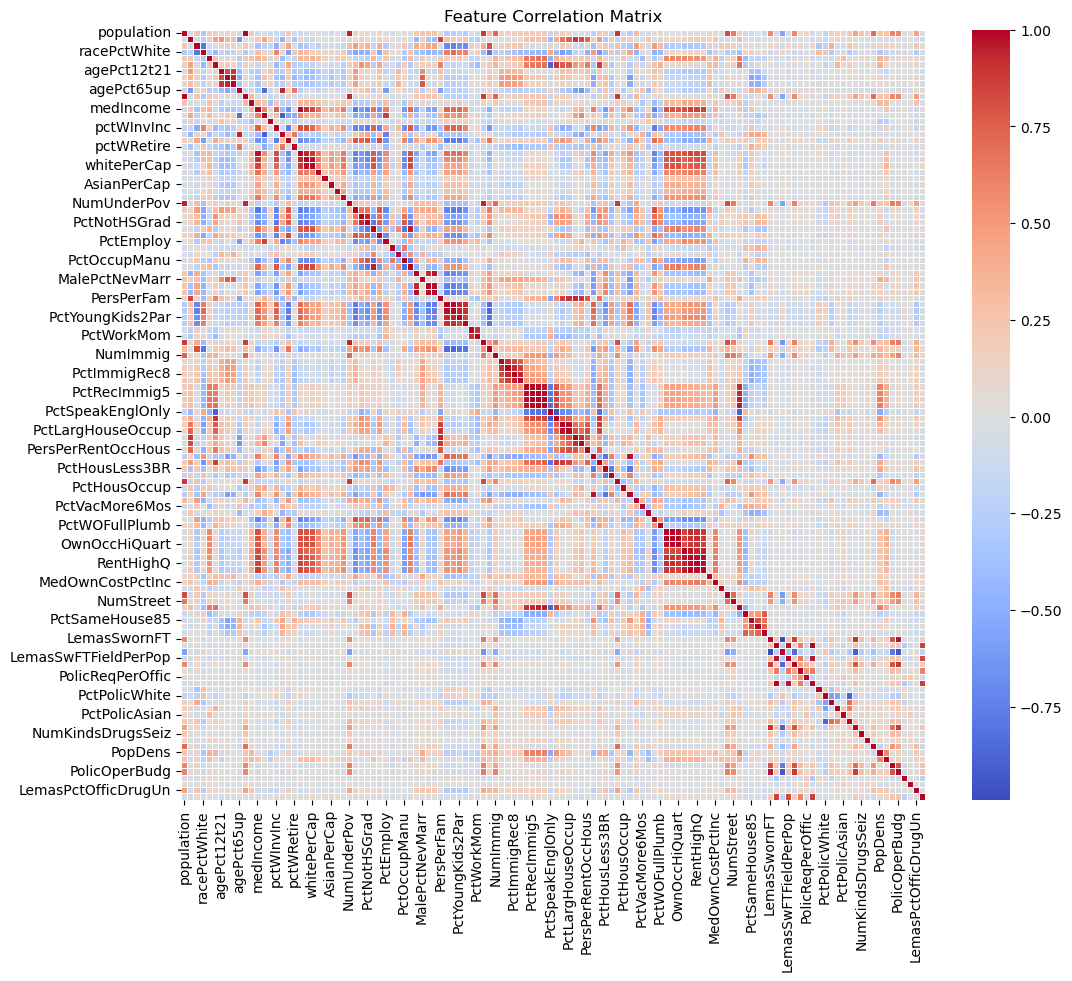

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot correlation matrix
plt.figure(figsize=(12, 10))
corr_matrix = X.corr()
sns.heatmap(corr_matrix, cmap="coolwarm", annot=False, linewidths=0.5)
plt.title("Feature Correlation Matrix")
plt.show()


(d) Calculate the Coeﬃcient of Variation CV for each feature

In [9]:
# Calculate Coefficient of Variation (CV) for each feature
cv_values = X.std() / X.mean()
cv_values = cv_values.sort_values(ascending=False)

# Print CV values
print("Coefficient of Variation (CV) for each feature:")
print(cv_values)

Coefficient of Variation (CV) for each feature:
NumStreet              4.407702
NumInShelters          3.485481
NumIlleg               2.994196
NumImmig               2.900497
LemasPctOfficDrugUn    2.555266
                         ...   
NumKindsDrugsSeiz      0.145956
RacialMatchCommPol     0.131417
LemasPctPolicOnPatr    0.122331
PctPolicWhite          0.121659
LemasSwFTFieldOps      0.057126
Length: 122, dtype: float64


(e) Pick ⌊√128⌋ features with highest CV, and make scatter plots and box plots for
them.

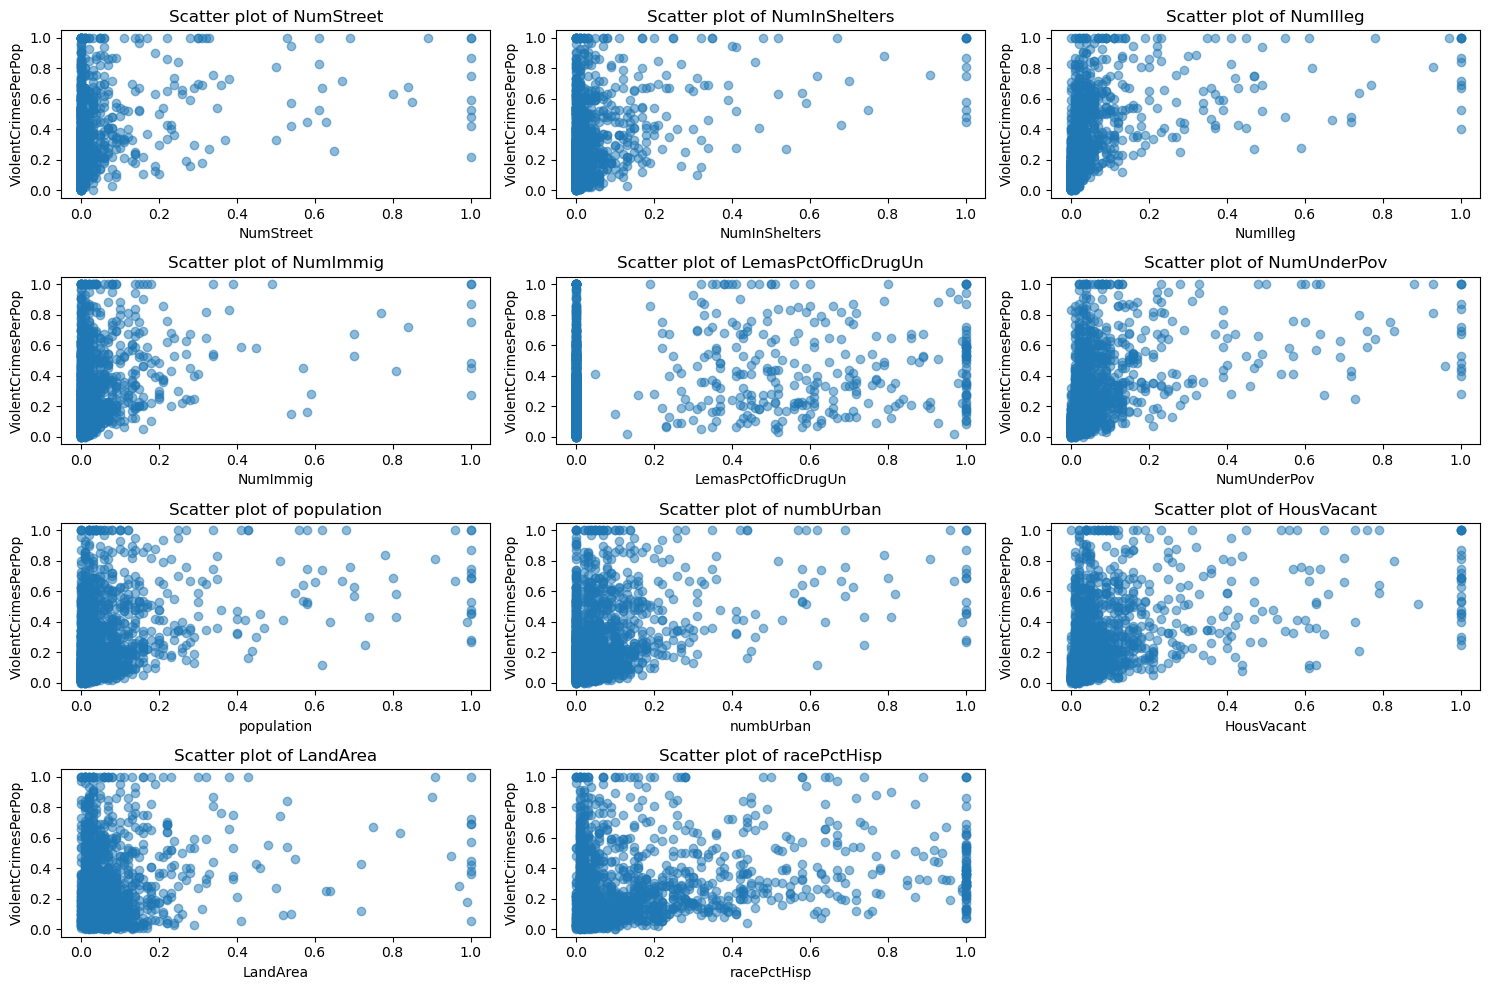

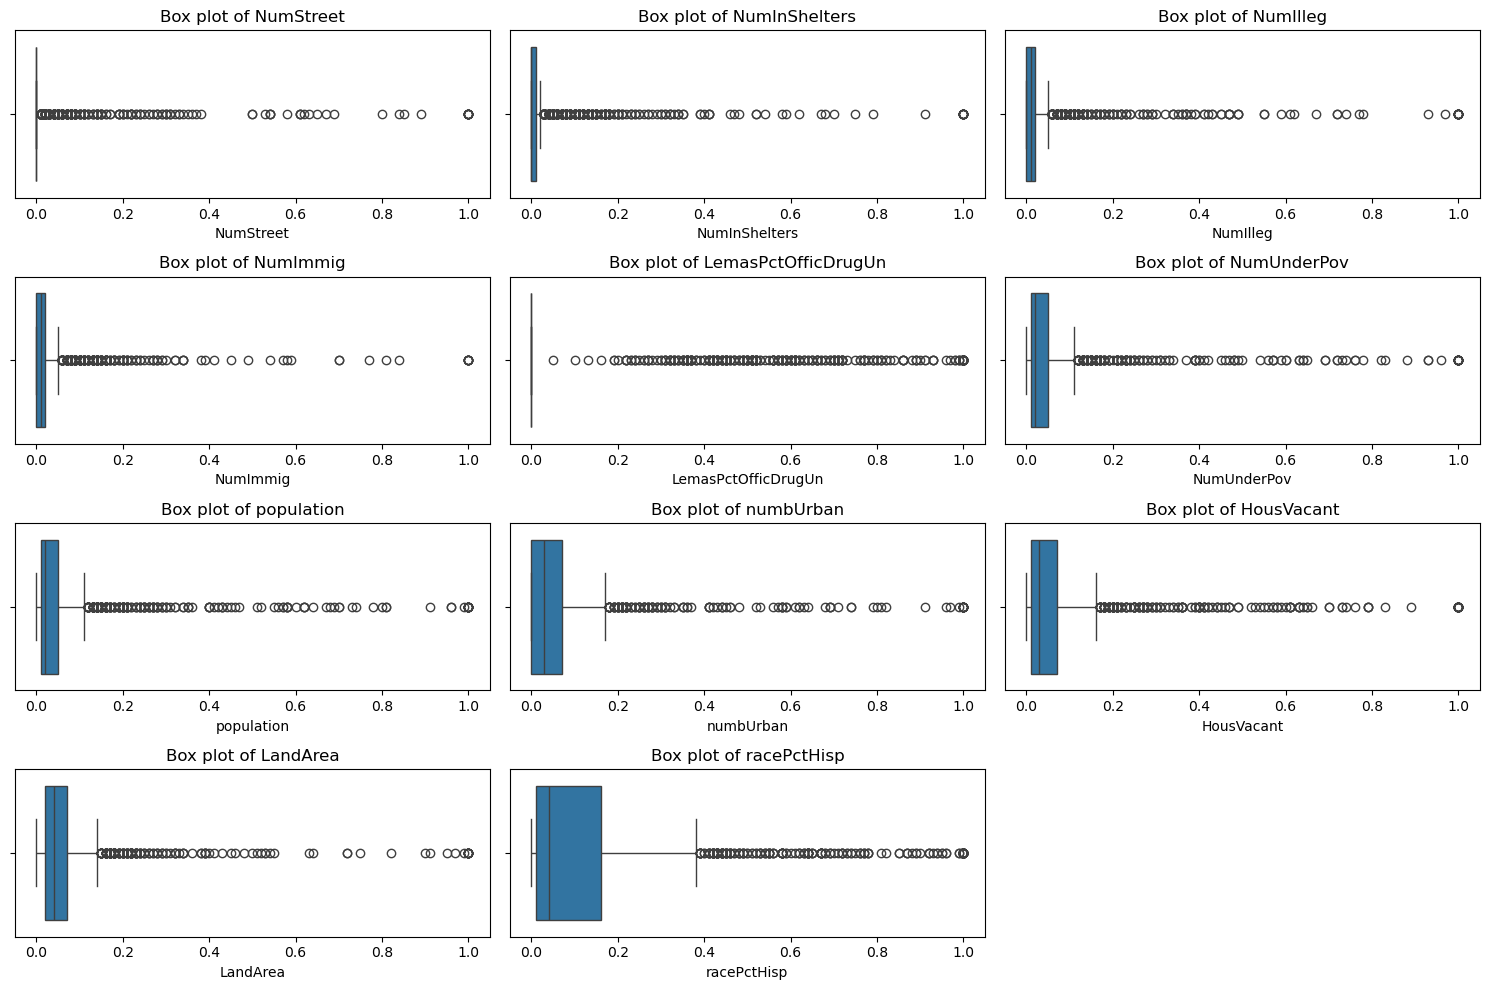

In [10]:
import numpy as np

# Select top ⌊√128⌋ = 11 features with highest CV
num_features = int(np.floor(np.sqrt(128)))
top_features = cv_values.head(num_features).index

# Scatter plots
plt.figure(figsize=(15, 10))
for i, feature in enumerate(top_features, 1):
    plt.subplot(4, 3, i)
    plt.scatter(X[feature], y, alpha=0.5)
    plt.xlabel(feature)
    plt.ylabel("ViolentCrimesPerPop")
    plt.title(f"Scatter plot of {feature}")
plt.tight_layout()
plt.show()

# Box plots
plt.figure(figsize=(15, 10))
for i, feature in enumerate(top_features, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(x=X[feature])
    plt.title(f"Box plot of {feature}")
plt.tight_layout()
plt.show()

It is hard to draw conclusions about significance of those features just by the
scatter plots.

(f) Fit a linear model using least squares to the training set and report the test error.

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Fit a linear model using least squares
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Predict on the test set
y_pred = linear_model.predict(X_test)

# Calculate test error (Mean Squared Error)
test_error = mean_squared_error(y_test, y_pred)
print(f"Test Error (MSE): {test_error}")

Test Error (MSE): 0.7897255274384668


(g) Fit a ridge regression model on the training set, with λchosen by cross-validation.
Report the test error obtained.

In [12]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

# Fit a Ridge regression model with cross-validation
ridge = Ridge()
param_grid = {'alpha': np.logspace(-3, 3, 100)}
ridge_cv = GridSearchCV(ridge, param_grid, scoring='neg_mean_squared_error', cv=5)
ridge_cv.fit(X_train, y_train)

# Best Ridge model prediction
y_ridge_pred = ridge_cv.best_estimator_.predict(X_test)

# Calculate test error for Ridge regression
test_error_ridge = mean_squared_error(y_test, y_ridge_pred)
print(f"Test Error (MSE) for Ridge Regression: {test_error_ridge}")

Test Error (MSE) for Ridge Regression: 0.017613673811931446


(h) Fit a LASSO model on the training set, with λchosen by cross-validation. Report
the test error obtained, along with a list of the variables selected by the model.
Repeat with standardized features. Report the test error for both cases and
compare them.

In [13]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

# Fit a LASSO model with cross-validation
lasso = Lasso()
lasso_cv = GridSearchCV(lasso, param_grid, scoring='neg_mean_squared_error', cv=5)
lasso_cv.fit(X_train, y_train)

# Best LASSO model prediction
y_lasso_pred = lasso_cv.best_estimator_.predict(X_test)

# Calculate test error for LASSO regression
test_error_lasso = mean_squared_error(y_test, y_lasso_pred)
print(f"Test Error (MSE) for LASSO Regression: {test_error_lasso}")

# Variables selected by LASSO
selected_features = X.columns[np.abs(lasso_cv.best_estimator_.coef_) > 0]
print("Selected Features by LASSO:")
print(selected_features)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit a LASSO model with standardized features
lasso_cv.fit(X_train_scaled, y_train)

y_lasso_scaled_pred = lasso_cv.best_estimator_.predict(X_test_scaled)

test_error_lasso_scaled = mean_squared_error(y_test, y_lasso_scaled_pred)
print(f"Test Error (MSE) for LASSO Regression with Standardized Features: {test_error_lasso_scaled}")

Test Error (MSE) for LASSO Regression: 0.017545287811568618
Selected Features by LASSO:
Index(['racepctblack', 'racePctWhite', 'agePct12t29', 'pctUrban',
       'pctWPubAsst', 'AsianPerCap', 'MalePctDivorce', 'PctKids2Par',
       'PctYoungKids2Par', 'PctWorkMom', 'PctIlleg', 'PctRecImmig10',
       'PctPersDenseHous', 'HousVacant', 'PctHousOccup', 'PctVacantBoarded',
       'MedRentPctHousInc', 'MedOwnCostPctIncNoMtg', 'NumStreet',
       'PctForeignBorn', 'PctSameCity85', 'LemasGangUnitDeploy',
       'LemasPctOfficDrugUn'],
      dtype='object')
Test Error (MSE) for LASSO Regression with Standardized Features: 0.017762886468429207


Non-standardized LASSO regression achieved a test error (MSE) of 0.0175, while standardized LASSO regression had a slightly higher test error of 0.0178.
The difference in test error is minimal, suggesting that standardization did not significantly improve the model’s performance. This is likely because the dataset is already normalized to a [0,1] range.
The selected features may vary slightly between the two approaches due to LASSO's sensitivity to feature scaling.
Generally, standardized LASSO regression is preferred for datasets with varying feature scales, but in this case, standardization had little impact.

(i) Fit a PCR model on the training set, with M (the number of principal compo-
nents) chosen by cross-validation. Report the test error obtained.

In [14]:
from sklearn.decomposition import PCA

# Fit a PCR model with cross-validation
pca = PCA()
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Cross-validation to find optimal number of principal components
mse_scores = []
for m in range(1, X_train_pca.shape[1] + 1):
    pcr_model = LinearRegression()
    pcr_model.fit(X_train_pca[:, :m], y_train)
    y_pcr_pred = pcr_model.predict(X_test_pca[:, :m])
    mse_scores.append(mean_squared_error(y_test, y_pcr_pred))

optimal_m = np.argmin(mse_scores) + 1
print(f"Optimal number of principal components: {optimal_m}")

# Fit final PCR model with optimal components
final_pcr_model = LinearRegression()
final_pcr_model.fit(X_train_pca[:, :optimal_m], y_train)
y_pcr_final_pred = final_pcr_model.predict(X_test_pca[:, :optimal_m])

# Calculate test error for PCR
test_error_pcr = mean_squared_error(y_test, y_pcr_final_pred)
print(f"Test Error (MSE) for PCR: {test_error_pcr}")

Optimal number of principal components: 22
Test Error (MSE) for PCR: 0.01759137708150669


(j) In this section, we would like to fit a boosting tree to the data. As in classification
trees, one can use any type of regression at each node to build a multivariate
regression tree. Because the number of variables is large in this problem, one
can use L1-penalized regression at each node. Such a tree is called L1 penalized
gradient boosting tree. You can use XGBoost to fit the model tree. Determine
α (the regularization term) using cross-validation.

In [15]:
import xgboost as xgb

# Fit a boosting tree using XGBoost with L1-penalization
xgb_model = xgb.XGBRegressor(objective='reg:squarederror')
param_grid = {'alpha': np.logspace(-3, 3, 10)}
xgb_cv = GridSearchCV(xgb_model, param_grid, scoring='neg_mean_squared_error', cv=5)
xgb_cv.fit(X_train, y_train)

# Best XGBoost model prediction
y_xgb_pred = xgb_cv.best_estimator_.predict(X_test)

# Calculate test error for XGBoost
test_error_xgb = mean_squared_error(y_test, y_xgb_pred)
print(f"Test Error (MSE) for XGBoost Regression: {test_error_xgb}")

# Optimal regularization term (alpha)
best_alpha = xgb_cv.best_params_['alpha']
print(f"Optimal regularization term (alpha) for XGBoost: {best_alpha}")


Test Error (MSE) for XGBoost Regression: 0.01816742857367383
Optimal regularization term (alpha) for XGBoost: 2.154434690031882
